In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# KMeans
비지도학습 클래스

In [ ]:
iris=load_iris()

In [8]:
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [9]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300).fit(irisDF)

In [12]:
#각 데이터가 어떤 중심에 속하는지 알 수 있음
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
irisDF['cluster']=kmeans.labels_

In [15]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
irisDF['target']=iris.target

In [20]:
irisDF.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [23]:
#붓꽃 데이터 세트의 속성이 4개이므로 2차원평면 표현위해 2개로 차원 축소
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]

In [24]:
markers=['o','s','^']
#군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
#matplotlib의 산점도는 서로 다른 마커를 한번에 표현할 수 없기 떄문
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

In [26]:
irisDF.loc[marker0_ind,'pca_x']

50     1.284826
51     0.932489
53     0.183318
54     1.088103
55     0.641669
         ...   
133    1.444161
138    1.169326
142    1.415236
146    1.527167
149    1.390189
Name: pca_x, Length: 62, dtype: float64

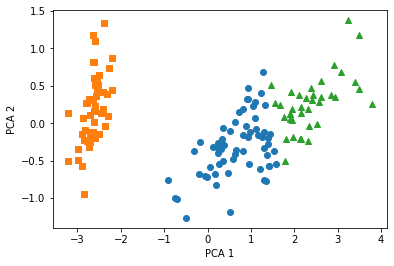

In [28]:
#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값 추출
#o,s,^마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [29]:
from sklearn.datasets import make_blobs
import numpy as np

In [30]:
X,y=make_blobs(n_samples=200,n_features=2,centers=3,random_state=0)
print(X.shape,y.shape)

(200, 2) (200,)


In [32]:
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

[0 1 2] [67 67 66]


In [34]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF

,ftr1,ftr2,target
0,-1.733808,3.798061,2
1,0.628358,4.460136,0
2,1.131218,4.681950,0
3,-1.429179,3.500836,2
4,1.274508,5.630173,0
...,...,...,...
195,3.181903,-0.182268,1
196,-2.210915,4.577433,2
197,2.965446,1.214882,1
198,1.289338,3.449692,0


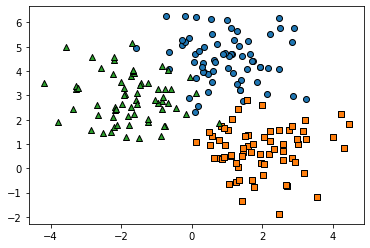

In [41]:
target_list=np.unique(y)
markers=['o','s','^']
for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],marker=markers[target],edgecolor='k')
plt.show()    

In [43]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels
clusterDF

,ftr1,ftr2,target,kmeans_label
0,-1.733808,3.798061,2,2
1,0.628358,4.460136,0,0
2,1.131218,4.681950,0,0
3,-1.429179,3.500836,2,2
4,1.274508,5.630173,0,0
...,...,...,...,...
195,3.181903,-0.182268,1,1
196,-2.210915,4.577433,2,2
197,2.965446,1.214882,1,1
198,1.289338,3.449692,0,0


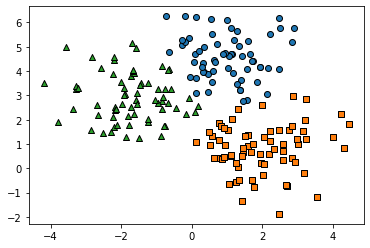

In [44]:
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(label_cluster['ftr1'],label_cluster['ftr2'],edgecolors='k',marker=markers[label])
plt.show()    

In [45]:
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [46]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [49]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
#irisDF['cluster']=kmeans.labels_
irisDF['cluster']=kmeans.labels_

In [50]:
#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
irisDF['silhouette_coeff']=score_samples

average_score=silhouette_score(iris.data,irisDF['cluster'])
average_score

0.5528190123564091

In [51]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0.425136
146,6.3,2.5,5.0,1.9,2,0.104171
147,6.5,3.0,5.2,2.0,0,0.314930
148,6.2,3.4,5.4,2.3,0,0.352454


In [52]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

# Mean Shift
대역폭의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적으로 정함

In [54]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
meanshift=MeanShift(bandwidth=0.9)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


In [55]:
#bandwidth 값을 작게 할수록 군집개수가 많아진다.
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [57]:
#사이킷런은 최적화된 bandwidth값을 찾기 위해 estimate_bandwidth()제공
from sklearn.cluster import estimate_bandwidth
bandwidth= estimate_bandwidth(X,quantile=0.2)
bandwidth

1.443521103865421

In [58]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


cluster labels 유형: [0 1 2]


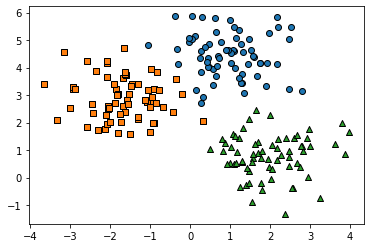

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64

In [62]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

clusterDF['meanshift_label']=cluster_labels
unique_labels=np.unique(cluster_labels)
markers=['o','s','^']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    plt.scatter(label_cluster['ftr1'],label_cluster['ftr2'],marker=markers[label],edgecolor='k')
plt.show()

clusterDF.groupby('target')['meanshift_label'].value_counts()

# GMM
GMM은 확률기반 군집화이고 K-평균은 거리기반 군집화

In [66]:
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF['target']=iris.target

In [65]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit_predict(iris.data)
irisDF['gmm_cluster']=gmm
irisDF.groupby('target')['gmm_cluster'].value_counts()

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64

# DBSCAN
밀도 기반 군집화

eps : 입실론 주변 영역의 반경을 의미 / min_samples : 데이터의 최소 개수 

In [69]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_label=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_label
irisDF.groupby('target')['dbscan_cluster'].value_counts()
#-1에 속하는 군집은 노이즈에 속하는 군집
#DBSCAN에서는 군집의 개수르르 알고리즘에 따라 자동 지정하므로 군집의 개수를 지정하는 것이 무의미


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

# 고객 세그먼테이션의 정의와 기법
RFM 기법 : Recency가장최근 상품구입일에서 오늘까지의 기간, Frequency상품구매횟수, Monetary value총구매금엑

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
retail_df=pd.read_excel(r'C:\Users\PC\Desktop\새 폴더\OnlineRetail.xlsx')

In [33]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [169]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,now,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2021-02-19,3732 days 15:34:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2021-02-19,3732 days 15:34:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2021-02-19,3732 days 15:34:00


In [9]:
import datetime

In [35]:
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'])

In [36]:
retail_df['now']=datetime.date.today()
retail_df['now']=pd.to_datetime(retail_df['now'])
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,now
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2021-02-19
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2021-02-19
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2021-02-19


In [37]:
retail_df['Recency']=retail_df['now']-retail_df['InvoiceDate']

In [171]:
retail_DF=retail_df[retail_df['CustomerID'].notnull()]

In [110]:
retail_DF.groupby('CustomerID')['Quantity']

In [172]:
retailDF=retail_DF[(retail_DF['Quantity']>0)&(retail_DF['UnitPrice']>0)]

In [173]:
retailDF['TotalPrice']=retailDF['Quantity']*retailDF['UnitPrice']

<ipython-input-173-e21cd83fbdd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retailDF['TotalPrice']=retailDF['Quantity']*retailDF['UnitPrice']


In [182]:
agg_format={'InvoiceNo':'count','TotalPrice':'sum','InvoiceDate':'max'}
cust_df=retailDF.groupby('CustomerID')[['InvoiceNo','TotalPrice','InvoiceDate']].agg(agg_format)
cust_df

,InvoiceNo,TotalPrice,InvoiceDate
CustomerID,,,
12346.0,1,77183.60,2011-01-18 10:01:00
12347.0,182,4310.00,2011-12-07 15:52:00
12348.0,31,1797.24,2011-09-25 13:13:00
12349.0,73,1757.55,2011-11-21 09:51:00
12350.0,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280.0,10,180.60,2011-03-07 09:52:00
18281.0,7,80.82,2011-06-12 10:53:00
18282.0,12,178.05,2011-12-02 11:43:00


In [183]:
cust_df=cust_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'Monetary'})
cust_df=cust_df.reset_index()
cust_df

,CustomerID,Frequency,Monetary,Recency
0,12346.0,1,77183.60,2011-01-18 10:01:00
1,12347.0,182,4310.00,2011-12-07 15:52:00
2,12348.0,31,1797.24,2011-09-25 13:13:00
3,12349.0,73,1757.55,2011-11-21 09:51:00
4,12350.0,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280.0,10,180.60,2011-03-07 09:52:00
4334,18281.0,7,80.82,2011-06-12 10:53:00
4335,18282.0,12,178.05,2011-12-02 11:43:00
4336,18283.0,756,2094.88,2011-12-06 12:02:00


In [184]:
import datetime as dt
cust_df['Recency']=dt.datetime(2011,12,10)-cust_df['Recency']


In [185]:
cust_df['Recency']=cust_df['Recency'].apply(lambda x : x.days+1)

In [186]:
cust_df

,CustomerID,Frequency,Monetary,Recency
0,12346.0,1,77183.60,326
1,12347.0,182,4310.00,3
2,12348.0,31,1797.24,76
3,12349.0,73,1757.55,19
4,12350.0,17,334.40,311
...,...,...,...,...
4333,18280.0,10,180.60,278
4334,18281.0,7,80.82,181
4335,18282.0,12,178.05,8
4336,18283.0,756,2094.88,4


(array([4.303e+03, 1.800e+01, 9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([3.75000000e+00, 2.80239770e+04, 5.60442040e+04, 8.40644310e+04,
        1.12084658e+05, 1.40104885e+05, 1.68125112e+05, 1.96145339e+05,
        2.24165566e+05, 2.52185793e+05, 2.80206020e+05]),
 <a list of 10 Patch objects>)

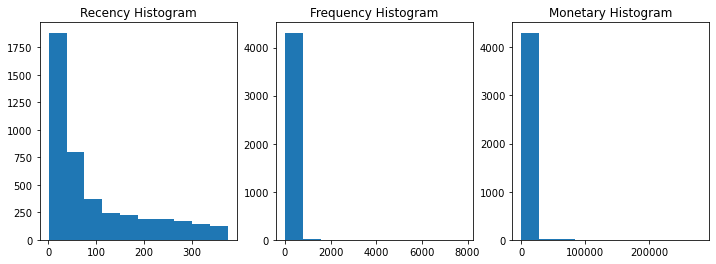

In [187]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])
ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])
ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [188]:
cust_df.describe()

,CustomerID,Frequency,Monetary,Recency
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.720609,2054.266460,93.059474
std,1721.808492,228.785094,8989.230441,100.012264
min,12346.000000,1.000000,3.750000,1.000000
25%,13813.250000,17.000000,307.415000,18.000000
50%,15299.500000,41.000000,674.485000,51.000000
75%,16778.750000,100.000000,1661.740000,142.750000
max,18287.000000,7847.000000,280206.020000,374.000000


In [189]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

X_features=cust_df[['Recency','Monetary','Frequency']].values
X_features_scaled=MinMaxScaler().fit_transform(X_features)

In [190]:
kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels
silhouette_score(X_features_scaled,labels)

0.6531526640361567

In [192]:
cust_df.groupby('CustomerID')['cluster_label'].count()

CustomerID
12346.0    1
12347.0    1
12348.0    1
12349.0    1
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    1
18287.0    1
Name: cluster_label, Length: 4338, dtype: int64

In [193]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [194]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

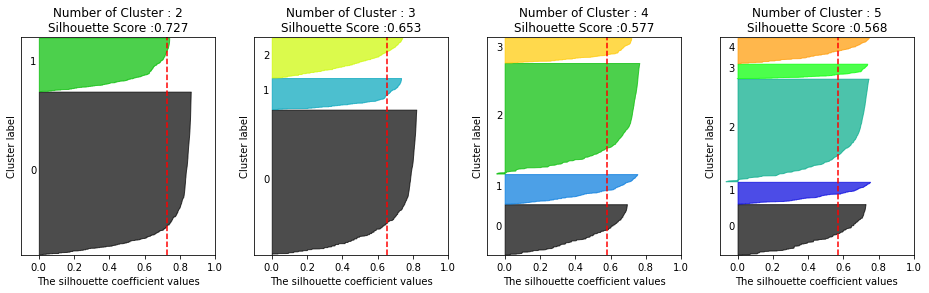

In [195]:
visualize_silhouette([2,3,4,5],X_features_scaled)

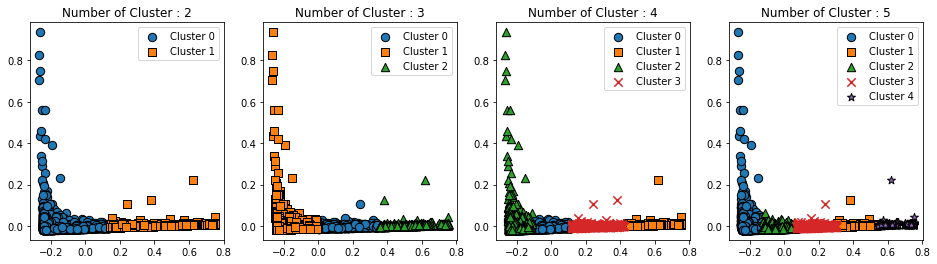

In [196]:
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

(array([   4.,   26.,  268., 1123., 1435., 1013.,  367.,   71.,   24.,
           7.]),
 array([ 1.55814462,  2.65665855,  3.75517249,  4.85368642,  5.95220036,
         7.05071429,  8.14922823,  9.24774216, 10.3462561 , 11.44477003,
        12.54328397]),
 <a list of 10 Patch objects>)

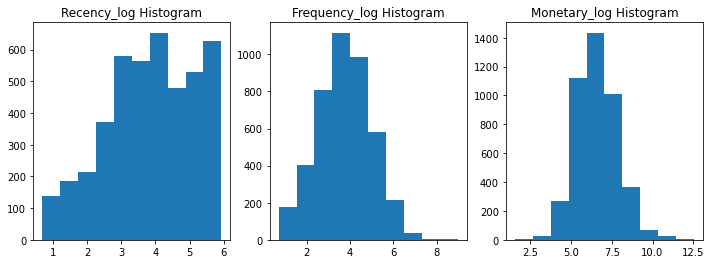

In [197]:
cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency_log Histogram')
ax1.hist(cust_df['Recency_log'])
ax2.set_title('Frequency_log Histogram')
ax2.hist(cust_df['Frequency_log'])
ax3.set_title('Monetary_log Histogram')
ax3.hist(cust_df['Monetary_log'])

In [204]:
from sklearn.preprocessing import StandardScaler

(array([4.303e+03, 1.800e+01, 9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.22813442,  2.88931344,  6.0067613 ,  9.12420916, 12.24165701,
        15.35910487, 18.47655273, 21.59400059, 24.71144845, 27.8288963 ,
        30.94634416]),
 <a list of 10 Patch objects>)

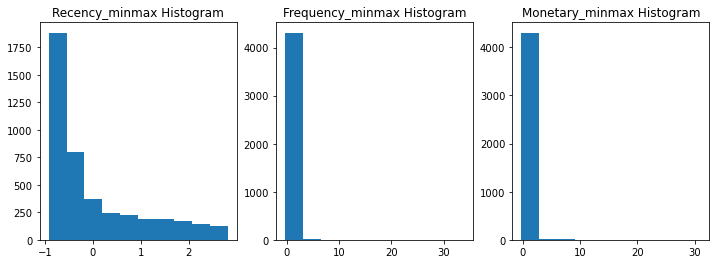

In [205]:
minmax=StandardScaler()
cust_df['Recency_minmax']=minmax.fit_transform(cust_df['Recency'].values.reshape(-1,1))
cust_df['Frequency_minmax']=minmax.fit_transform(cust_df['Frequency'].values.reshape(-1,1))
cust_df['Monetary_minmax']=minmax.fit_transform(cust_df['Monetary'].values.reshape(-1,1))

fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency_minmax Histogram')
ax1.hist(cust_df['Recency_minmax'])
ax2.set_title('Frequency_minmax Histogram')
ax2.hist(cust_df['Frequency_minmax'])
ax3.set_title('Monetary_minmax Histogram')
ax3.hist(cust_df['Monetary_minmax'])

In [214]:
X_features=cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

In [215]:
kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels
silhouette_score(X_features_scaled,labels)

0.3040354981369291

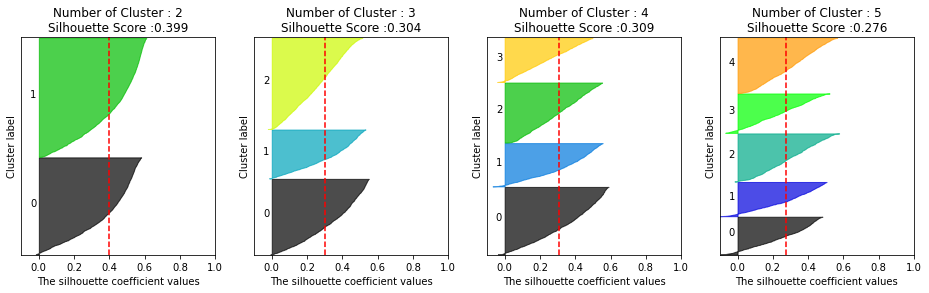

In [219]:
visualize_silhouette([2,3,4,5],X_features_scaled)

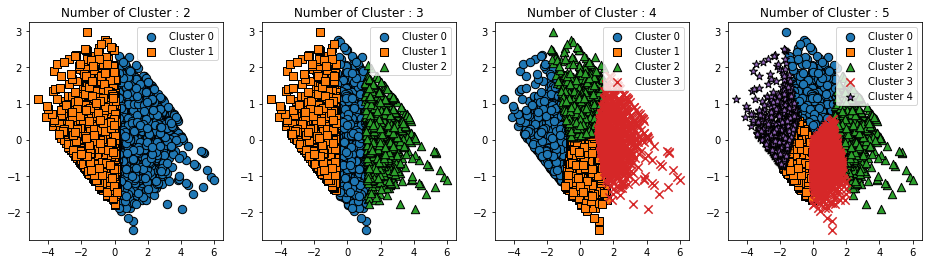

In [209]:
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

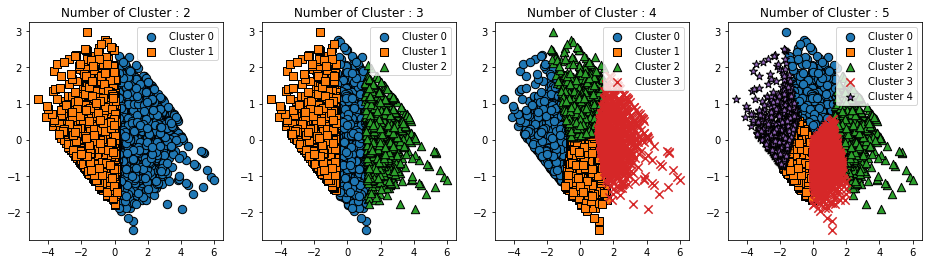

In [210]:
from sklearn.cluster import MeanShift
meanshift=MeanShift(bandwidth=1)
label=meanshift.fit_predict(X_features_scaled)
cust_df['cluster_labels']=label
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

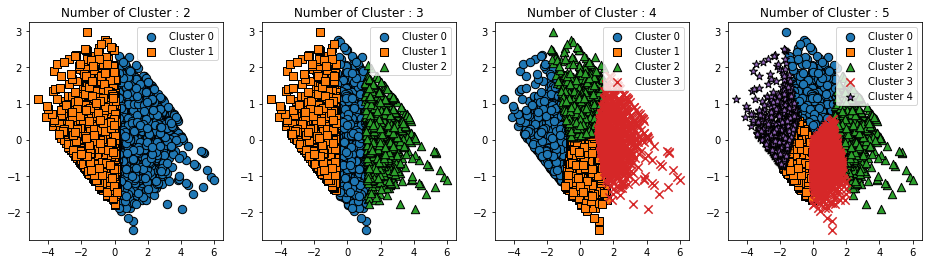

In [212]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3,random_state=0).fit_predict(X_features_scaled)
cust_df['cluster_labell']=gmm
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [235]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer =GaussianMixture(n_components=3,random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(cluster_labels)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

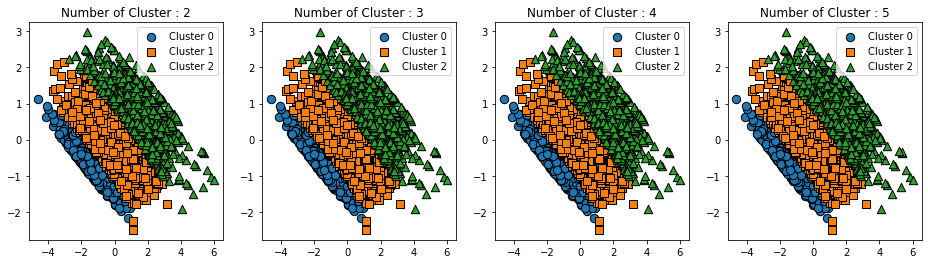

In [236]:
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [213]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [217]:
cust_df

,CustomerID,Frequency,Monetary,Recency,cluster_label,Recency_log,Frequency_log,Monetary_log,Recency_minmax,Frequency_minmax,Monetary_minmax,cluster_labels,cluster_labell
0,12346.0,1,77183.60,326,2,5.789960,0.693147,11.253955,2.329388,-0.396578,8.358668,3,1
1,12347.0,182,4310.00,3,1,1.386294,5.209486,8.368925,-0.900588,0.394649,0.250966,1,2
2,12348.0,31,1797.24,76,2,4.343805,3.465736,7.494564,-0.170593,-0.265435,-0.028596,0,2
3,12349.0,73,1757.55,19,2,2.995732,4.304065,7.472245,-0.740589,-0.081836,-0.033012,0,2
4,12350.0,17,334.40,311,0,5.743003,2.890372,5.815324,2.179389,-0.326635,-0.191347,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,10,180.60,278,0,5.631212,2.397895,5.201806,1.849392,-0.357235,-0.208459,0,0
4334,18281.0,7,80.82,181,0,5.204007,2.079442,4.404522,0.879399,-0.370349,-0.219560,0,0
4335,18282.0,12,178.05,8,2,2.197225,2.564949,5.187665,-0.850588,-0.348492,-0.208742,0,2
4336,18283.0,756,2094.88,4,1,1.609438,6.629363,7.647729,-0.890588,2.903843,0.004519,1,1
